<a href="https://colab.research.google.com/github/ishaali14/cautious-broccoli/blob/main/EasyORC_cpu_vs_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr
!pip install torch torchvision torchaudio


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [38]:
import easyocr
import cv2
from google.colab.patches import cv2_imshow
import time
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

reader_cpu = easyocr.Reader(['en'], gpu=False)
reader_gpu = easyocr.Reader(['en'], gpu=True)



Saving Samples-of-all-letters-and-digits-in-the-EMNIST-dataset_Q640.jpg to Samples-of-all-letters-and-digits-in-the-EMNIST-dataset_Q640 (6).jpg


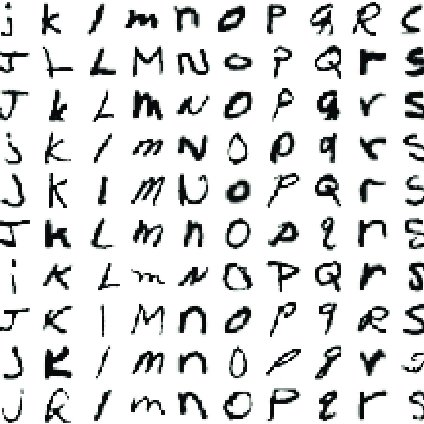

Results on CPU:
Detected text: j, Confidence: 0.4529187013696543
Detected text: 1 mn0 P, Confidence: 0.1576558020456059
Detected text: L Mn _, Confidence: 0.36149648742620466
Detected text: m N 0, Confidence: 0.33898852030823995
Detected text: U, Confidence: 0.054220385613170885
Detected text: Z, Confidence: 0.0687669377058775
Detected text: m, Confidence: 0.9966277943406112
Detected text: ;, Confidence: 0.04652206119098978
Detected text: 3, Confidence: 0.7879633910801118
Detected text: 0, Confidence: 0.07125720102083566
Detected text: p, Confidence: 0.6469398313687549
Detected text: #, Confidence: 0.8436347063366725
Detected text: L m " 0, Confidence: 0.3854952032567602
Detected text: 1, Confidence: 0.19448506083843942
Detected text: Mno, Confidence: 0.7971300732339088
Detected text: ps, Confidence: 0.04602519142732808
Detected text: m n 0 / ?, Confidence: 0.2029890286368541
Detected text: F, Confidence: 0.27558104213517254
Detected text: Imnop €, Confidence: 0.12122122160800125

Resu

In [39]:
from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]

start_time_cpu = time.time()
results_cpu = reader_cpu.readtext(image_path)
end_time_cpu = time.time()
cpu_time = end_time_cpu - start_time_cpu


start_time_gpu = time.time()
results_gpu = reader_gpu.readtext(image_path)
end_time_gpu = time.time()
gpu_time = end_time_gpu - start_time_gpu

image = cv2.imread(image_path)
cv2_imshow(image)

print("Results on CPU:")
for result in results_cpu:
    print(f"Detected text: {result[1]}, Confidence: {result[2]}")

print("\nResults on GPU:")
for result in results_gpu:
    print(f"Detected text: {result[1]}, Confidence: {result[2]}")

# Save results to a file
with open('/content/drive/MyDrive/ocr_results.txt', 'w') as f:
    for result in results_cpu:
        f.write(f"Detected text (CPU): {result[1]}, Confidence: {result[2]}\n")
    for result in results_gpu:
        f.write(f"Detected text (GPU): {result[1]}, Confidence: {result[2]}\n")


In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

ground_truth = ["j", "1 mn0 P", "L Mn _", "m N 0", "U", "Z", "m", ";", "3", "0", "p", "#", "L m \" 0", "1", "Mno", "ps", "m n 0 / ?", "F", "Imnop €"]
predictions = [result[1] for result in results_cpu]
if len(ground_truth) != len(predictions):
    print("Warning: Length of ground truth and predictions do not match. Ensure they are aligned.")
precision = precision_score(ground_truth, predictions, average='weighted', zero_division=0)
recall = recall_score(ground_truth, predictions, average='weighted', zero_division=0)
f1 = f1_score(ground_truth, predictions, average='weighted', zero_division=0)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 1.00
Recall: 1.00
F1 Score: 1.00


CPU PROCESSING


In [43]:
# Calculate FPS for GPU processing
def calculate_fps(reader, image_path):
    start_time = time.time()
    results = reader.readtext(image_path)
    end_time = time.time()
    duration = end_time - start_time
    fps = 1 / duration
    return fps

fps_gpu = calculate_fps(reader_gpu, image_path)
fps_cpu = calculate_fps(reader_cpu, image_path)

print(f"GPU FPS: {fps_gpu:.2f}")
print(f"CPU FPS: {fps_cpu:.2f}")


GPU FPS: 2.36
CPU FPS: 0.31


In [44]:
def compare_results(results_gpu, results_cpu):
    text_gpu = {result[1]: result[2] for result in results_gpu}
    text_cpu = {result[1]: result[2] for result in results_cpu}

    print("GPU Results Comparison:")
    for text, conf in text_gpu.items():
        print(f"Text: {text}, Confidence: {conf}")

    print("\nCPU Results Comparison:")
    for text, conf in text_cpu.items():
        print(f"Text: {text}, Confidence: {conf}")

compare_results(results_gpu, results_cpu)


GPU Results Comparison:
Text: j, Confidence: 0.476308369923629
Text: 1 mn0 P, Confidence: 0.19101160588243504
Text: L Mn _, Confidence: 0.4013400278062769
Text: m N 0, Confidence: 0.3105194330848256
Text: U, Confidence: 0.06482925800993655
Text: Z, Confidence: 0.08547892238939259
Text: m, Confidence: 0.9965030777320862
Text: ;, Confidence: 0.03939459239581944
Text: 3, Confidence: 0.8430559148681347
Text: 0, Confidence: 0.07825413733098774
Text: p, Confidence: 0.6212543868233666
Text: #, Confidence: 0.829639666446301
Text: L m " 0, Confidence: 0.3822043506603766
Text: 1, Confidence: 0.1427179013123956
Text: Mno, Confidence: 0.8137382055708122
Text: ps, Confidence: 0.049996983886446085
Text: m n 0 / ?, Confidence: 0.23156504397006636
Text: F, Confidence: 0.2967694848734972
Text: ImnOp €, Confidence: 0.12221959069425924

CPU Results Comparison:
Text: j, Confidence: 0.4529187013696543
Text: 1 mn0 P, Confidence: 0.1576558020456059
Text: L Mn _, Confidence: 0.36149648742620466
Text: m N 0, C